In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def get_initial_centroids(X, k):
  
    number_of_samples = X.shape[0]
    sample_points_ids = random.sample(range(0, number_of_samples), k)#selecting points randomly

    centroids = [tuple(X[id]) for id in sample_points_ids] #assing value to randomly sampled id
    unique_centroids = list(set(centroids)) #making it a list after sorting ti avoid repetition if few points overlapped

    number_of_unique_centroids = len(unique_centroids)
    
    #redoing the sample if overlapped
    
    while number_of_unique_centroids < k:
        new_sample_points_ids = random.sample(range(0, number_of_samples), k - number_of_unique_centroids)
        new_centroids = [tuple(X[id]) for id in new_sample_points_ids]
        unique_centroids = list(set(unique_centroids + new_centroids))

        number_of_unique_centroids = len(unique_centroids)

    return np.array(unique_centroids)

In [3]:
def get_euclidean_distance(A_matrix, B_matrix):

   
   #using matrix product for getting euclidean_distance

    A_square = np.reshape(np.sum(A_matrix * A_matrix, axis=1), (A_matrix.shape[0], 1))
    B_square = np.reshape(np.sum(B_matrix * B_matrix, axis=1), (1, B_matrix.shape[0]))
    AB = A_matrix @ B_matrix.T

    C = -2 * AB + B_square + A_square

    return np.sqrt(C)

In [4]:
def get_clusters(X, centroids, distance_mesuring_method):

    

    k = centroids.shape[0]

    clusters = {}

    distance_matrix = distance_mesuring_method(X, centroids)

    closest_cluster_ids = np.argmin(distance_matrix, axis=1)  #taking min distance wala point
 
    for i in range(k):  #creating a list for storing assigned points to each centre
        clusters[i] = []

    for i, cluster_id in enumerate(closest_cluster_ids):
        clusters[cluster_id].append(X[i])

    return clusters

In [5]:
def has_centroids_covered(previous_centroids, new_centroids, distance_mesuring_method, movement_threshold_delta):

    distances_between_old_and_new_centroids = distance_mesuring_method(previous_centroids, new_centroids)
    centroids_covered = np.max(distances_between_old_and_new_centroids.diagonal()) <= movement_threshold_delta

    return centroids_covered

In [6]:
def perform_k_means_algorithm(X, k, distance_mesuring_method, movement_threshold_delta=0):


    new_centroids = get_initial_centroids(X=X, k=k)

    centroids_covered = False

    while not centroids_covered:
        previous_centroids = new_centroids
        clusters = get_clusters(X, previous_centroids, distance_mesuring_method)

        new_centroids = np.array([np.mean(clusters[key], axis=0, dtype=X.dtype) for key in sorted(clusters.keys())])

        centroids_covered = has_centroids_covered(previous_centroids, new_centroids, distance_mesuring_method, movement_threshold_delta)

    return new_centroids

FileNotFoundError: [Errno 2] No such file or directory: 'pic_raw/girls1.png'

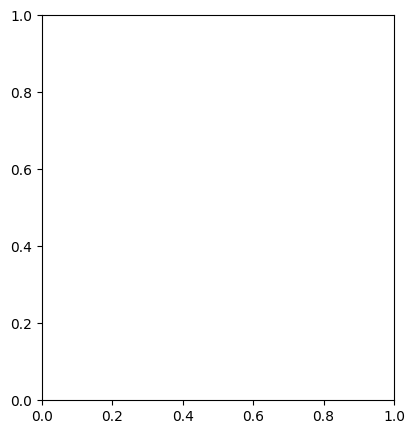

In [7]:
import numpy
from PIL import Image
from sklearn.cluster import KMeans
import numpy as  np
import matplotlib.pyplot as plt

def get_image(image_path):
    image = Image.open(image_path, "r")
    width, height = image.size
    pixel_values = list(image.getdata())
    if image.mode == "RGB":
        channels = 3
    elif image.mode == "L":
        channels = 1
    else:
        print("Unknown mode: %s" % image.mode)
        return None
    pixel_values = numpy.array(pixel_values).reshape((width, height, channels))
    return pixel_values
image_path_list=[]
for i in range(1,20):
    image= get_image("girl.png")
    image1=image
    h, w, d = image.shape

    X = np.reshape(image, (h * w, d))
    X = np.array(X, dtype=np.int32)

    centroids = perform_k_means_algorithm(X, k=i, distance_mesuring_method=get_euclidean_distance)
    distance_matrix = get_euclidean_distance(X, centroids)
    closest_cluster_ids = np.argmin(distance_matrix, axis=1)

    X_reconstructed = centroids[closest_cluster_ids]
    X_reconstructed = np.array(X_reconstructed, dtype=np.uint8)
    compressed_image_2d = np.reshape(X_reconstructed, (h, w, d))
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 2)
    plt.imsave('pic_raw/girls{}.png'.format(i),compressed_image_2d)
    image_path_list.append('pic_raw/girls{}.png'.format(i))
    plt.title(f'Compressed Image (k={i})')
    plt.imshow(compressed_image_2d)
    plt.axis('off')
    plt.show()

In [ ]:
from PIL import Image
image_list = [Image.open(file) for file in image_path_list]
# Save the first image as a GIF file
image_list[0].save(
            'animation1.gif',
            save_all=True,
            append_images=image_list[1:], # append rest of the images
            duration=1000, # in milliseconds
            loop=0)